Q1: Data Preprocessing
You have been provided with a CSV file "Cars93.csv" The given dataset is related to cars and
contains 26 columns. In the given dataset, “Price” is the target variable (i.e., the output). The
marks distribution according to the tasks are as follows:

1. Assign a type to each of the following features (a) Model, (b) Type, (c) Max. Price and (d) Airbags from the following: ordinal/nominal/ratio/interval scale.
 a) Model - Nominal
 b) Type - Nominal
 c) Max. Price - Ratio
 d) Airbags - Nominal

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [ ]:
# load the dataset
ds_cars = pd.read_csv("../datasets/Cars93.csv")

In [1]:
# 2. Write a function to handle the missing values in the dataset (e.g., any NA, NaN values).
def handle_missing_values(df):
    df_copy = df.copy()  # To avoid modifying the original DataFrame
    col_impute = []
    for col in df_copy.columns:
        if df_copy[col].isnull().any():  # Check if there are any missing values in the column
            print(f"Handling missing values in column: {col}")

            if pd.api.types.is_numeric_dtype(df_copy[col]):
                col_impute.append(col)  # Correct assignment
    si = SimpleImputer(strategy="mean")
    df_copy[col_impute] = si.fit_transform(df_copy[col_impute])
    return df_copy

## impute non numeric values with mode
ds_cars_copy = handle_missing_values(ds_cars)

## Fill AirBag na values with No AirBag
ds_cars_copy['AirBags'] = ds_cars_copy['AirBags'].fillna('No AirBag')
sns.heatmap(ds_cars_copy.isnull())


NameError: name 'ds_cars' is not defined

In [ ]:
# 3. Write a function to reduce noise (any error in the feature) in individual attributes.

def create_boxplot(df):
    df_copy = df.copy()
    num_cols = df_copy.select_dtypes(include="float64").columns
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df_copy[num_cols])
    plt.xticks(rotation=45)
    plt.title("Box Plot of Numerical Features")
    plt.ylabel("Value")
    plt.xlabel("Features")
    plt.show()

def replace_outliers_iqr(df):
    for column in df.select_dtypes(include="float64").columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the bounds
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])  # Replace values below lower bound
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])  # Replace values above upper bound

    return df

# Example usage
# Assuming 'df' is your DataFrame and 'Price' is the column to remove outliers from

df_copy = ds_cars_copy.copy(deep=True)
create_boxplot(ds_cars_copy)
df_replaced = replace_outliers_iqr(df_copy)
create_boxplot(df_replaced)

In [ ]:
# 4. Write a function to encode all the categorical features in the dataset according to the type of variable jointly.

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df, nominal_features=None, ordinal_features=None):
    """
    Encodes categorical features in a dataset based on their type (nominal or ordinal).

    Parameters:
        df (pd.DataFrame): The input dataset.
        nominal_features (list): List of nominal feature names.
        ordinal_features (dict): Dictionary of ordinal feature names and their categories in order.

    Returns:
        pd.DataFrame: Dataset with encoded categorical features.
    """

    df_encoded = df.copy()

    # Label Encoding for nominal features
    if nominal_features:
        label_encoder = LabelEncoder()
        for feature in nominal_features:
            df_encoded[feature] = label_encoder.fit_transform(df_encoded[feature])

    # Ordinal Encoding for ordinal features
    if ordinal_features:
        for feature, categories in ordinal_features.items():
            ordinal_encoder = OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value=-1)
            df_encoded[feature] = ordinal_encoder.fit_transform(df_encoded[[feature]]).flatten()

    return df_encoded


# Define nominal and ordinal features
nominal_features = ["Manufacturer", "Type"]
ordinal_features = {
    "Cylinders": ["3", "4", "5", "6", "8"],  # Ordered categories
    "DriveTrain": ["4WD", "Front", "Rear"]   # Ordered categories
}

# Encode categorical features
encoded_data = encode_categorical_features(ds_cars_copy, nominal_features, ordinal_features)
print(encoded_data)

    Manufacturer    Model  Type  Min.Price  Price  Max.Price  MPG.city  \
0              0  Integra     3       12.9   15.9       18.8        25   
1              0   Legend     2       29.2   33.9       38.7        18   
2              1       90     0       25.9   29.1       32.3        20   
3              1      100     2       30.8   37.7       44.6        19   
4              2     535i     2       23.7   30.0       36.2        22   
..           ...      ...   ...        ...    ...        ...       ...   
88            30  Eurovan     5       16.6   19.7       22.7        17   
89            30   Passat     0       17.6   20.0       22.4        21   
90            30  Corrado     4       22.9   23.3       23.7        18   
91            31      240     0       21.8   22.7       23.5        21   
92            31      850     2       24.8   26.7       28.5        20   

    MPG.highway             AirBags  DriveTrain  ...  Fuel.tank.capacity  \
0            31           No AirBag

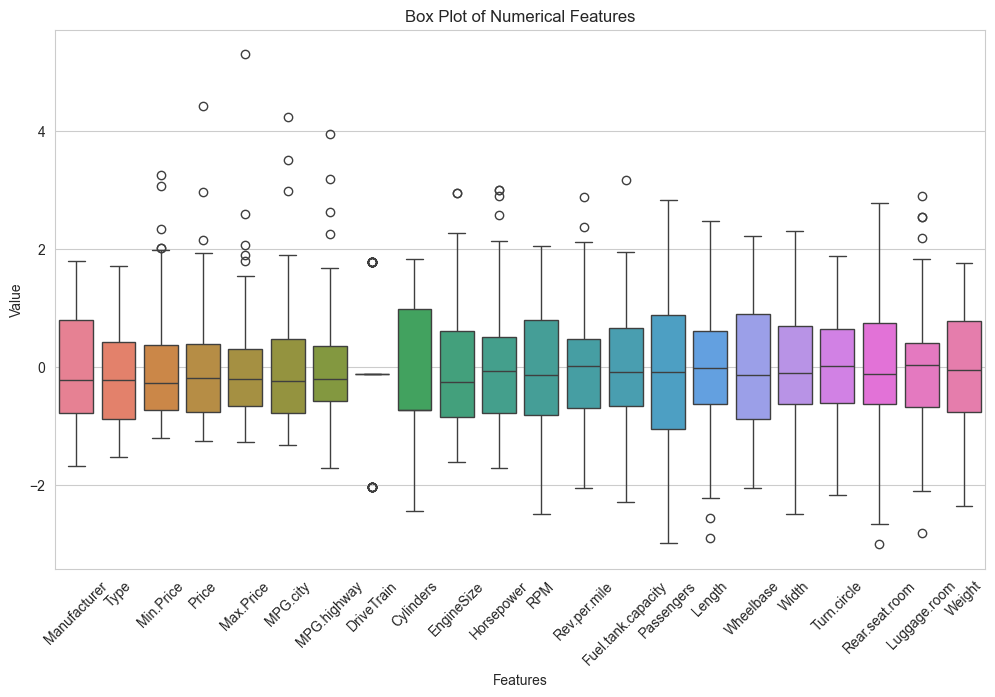

In [ ]:
from sklearn.preprocessing import StandardScaler


# 5 Write a function to normalize / scale the features either individually or jointly.
def scale_features(df):

    df_scale = df.copy()

    scaler = StandardScaler()
    float_column = df_scale.select_dtypes(include="float64").columns
    for column in float_column:
        df_scale[column] = scaler.fit_transform(df_scale[column].values.reshape(-1, 1))
    int_column = df_scale.select_dtypes(include="int64").columns
    for column in int_column:
        df_scale[column] = scaler.fit_transform(df_scale[column].values.reshape(-1, 1))
    return df_scale

# Scale the features
final_data = scale_features(encoded_data.reset_index(drop=True))


object_cols = final_data.select_dtypes(include="float64").columns
plt.figure(figsize=(12, 7))
sns.boxplot(data=final_data[object_cols])
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.ylabel("Value")
plt.xlabel("Features")
plt.show()

In [ ]:
# 6. Write a function to create a random split of the data into train, validation and test sets in the ratio of [70:20:10]
from sklearn.model_selection import train_test_split
def split_data(df):
    X = df.drop(columns=["Price"])  # Features (all columns except 'Price')
    y = df["Price"]

    # First, split the data into 70% training and 30% temporary (validation + test)
    X_train, X_temp, Y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

    # Then, split the temporary data into 20% validation and 10% test
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)
    return X_train, Y_train, X_val, y_val, X_test, y_test

X_train, Y_train, X_val, y_val, X_test, y_test = split_data(final_data)
print(X_train) #65
print(X_val) # 18
print(X_test) # 10

    Manufacturer         Model      Type  Min.Price  Max.Price  MPG.city  \
31     -0.551029        Escort  0.418243  -1.003095  -0.911397  0.113500   
77      1.127323           900 -1.526587   0.364897   1.385570 -0.423219   
9      -1.222369       DeVille -0.878310   1.824855   1.312650 -1.138845   
70      0.791653  Eighty-Eight -0.878310   0.272931   0.000098 -0.602126   
5      -1.334259       Century -0.230034  -0.336343  -0.419189 -0.065407   
..           ...           ...       ...        ...        ...       ...   
20     -0.886699       LeBaron -1.526587  -0.301856  -0.437419  0.113500   
60      0.455982        Cougar -0.230034  -0.255873  -0.637948 -0.602126   
71      0.903543         Laser  1.066519  -0.658223  -0.410075  0.113500   
14     -1.110479        Lumina -0.230034  -0.428309  -0.318925 -0.244313   
51      0.120312      Town_Car -0.878310   1.985795   1.449374 -0.781032   

    MPG.highway             AirBags  DriveTrain  Cylinders  ...  \
31     0.172352     

Q2a: Linear Regression Task. Use the “linear_regression_dataset.csv”

1. Implement the linear regression model to predict the dependency between two variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "/Users/souvmond/Downloads/Study/Material/Machine Learning/Assignment/linear_regression_dataset.csv"  # Update path if necessary
df = pd.read_csv(file_path)

# Display first few rows to understand structure
print(df.head())

# Assuming dataset has two columns: 'X' (features) and 'Y' (target)
X = df.iloc[:, :-1].values  # Independent variable(s)
y = df.iloc[:, -1].values   # Dependent variable

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)

results_df = pd.DataFrame({"X_test": X_test.flatten(), "y_pred": y_pred})
print("\n  Print the Test and Prediction data \n")
print(results_df.to_string(index=False))

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


   Height   Weight
0     1.47   52.21
1     1.50   53.12
2     1.52   54.48
3     1.55   55.84
4     1.57   57.20

  Print the Test and Prediction data 

 X_test    y_pred
   1.70 65.035797
   1.75 68.136508
   1.47 50.772524
   1.80 71.237220
   1.60 58.834374
Mean Squared Error: 0.6730959475011951
R² Score: 0.986463232472019


2. Print the coefficient obtained from linear regression and plot a straight line on the scatter
plot.

In [ ]:
# Get model parameters
intercept = model.intercept_
coefficient = model.coef_[0]
# Print the coefficient
# Y=mX+b , m is the coefficient, b is the intercept
print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")

Intercept: -40.388393810032014
Coefficient: 62.01422981145499


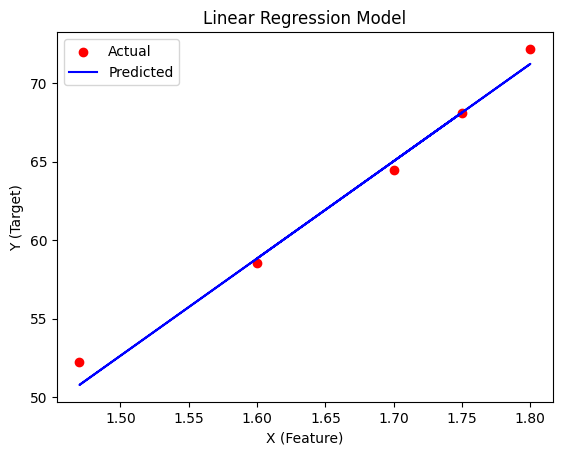

In [ ]:
if X.shape[1] == 1:
    plt.scatter(X_test, y_test, color='red', label="Actual")
    plt.plot(X_test, y_pred, color='blue', linewidth=1.5, label="Predicted")
    plt.xlabel("X (Feature)")
    plt.ylabel("Y (Target)")
    plt.title("Linear Regression Model")
    plt.legend()
    plt.show()

3. Now, implement linear regression without the use of any inbuilt function.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegressionTest:
    def __init__(self): #initialization
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term for intercept
        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # Normal Equation
        self.intercept_ = theta[0]  # First value to intercept
        self.coef_ = theta[1:]  # Remaining values to the coefficients

    def predict(self, X):
        X = np.array(X)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return X_b.dot(np.r_[self.intercept_, self.coef_])  # Compute predictions




# Load dataset
file_path = "/Users/souvmond/Downloads/Study/Material/Machine Learning/Assignment/linear_regression_dataset.csv"  # Update path if necessary
df = pd.read_csv(file_path)

# Display first few rows to understand structure
print(df.head())

# Assuming dataset has two columns: 'X' (features) and 'Y' (target)
X = df.iloc[:, :-1].values  # Independent variable(s)
y = df.iloc[:, -1].values   # Dependent variable

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Linear Regression model with inbuilt function
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Predict on test data
y_pred_inbuilt = model1.predict(X_test)


# Create and train the Linear Regression model with test function

model2 = LinearRegressionTest()
model2.fit(X_train, y_train)

# Predict on test data
y_pred_test = model2.predict(X_test)

results_df = pd.DataFrame({"X_test": X_test.flatten(), "y_pred_inbuilt": y_pred_inbuilt})
print("\n  Print the Test and Prediction data from inbuilt function\n")
print(results_df.to_string(index=False))


results_df = pd.DataFrame({"X_test": X_test.flatten(), "y_pred_inbuilt": y_pred_test})
print("\n  Print the Test and Prediction data from the test function\n")
print(results_df.to_string(index=False))



   Height   Weight
0     1.47   52.21
1     1.50   53.12
2     1.52   54.48
3     1.55   55.84
4     1.57   57.20

  Print the Test and Prediction data from inbuilt function

 X_test  y_pred_inbuilt
   1.70       65.035797
   1.75       68.136508
   1.47       50.772524
   1.80       71.237220
   1.60       58.834374

  Print the Test and Prediction data from the test function

 X_test  y_pred_inbuilt
   1.70       65.035797
   1.75       68.136508
   1.47       50.772524
   1.80       71.237220
   1.60       58.834374


4. Compare the results of 1 and 3 graphically.

Plot the the inbuilt regression model


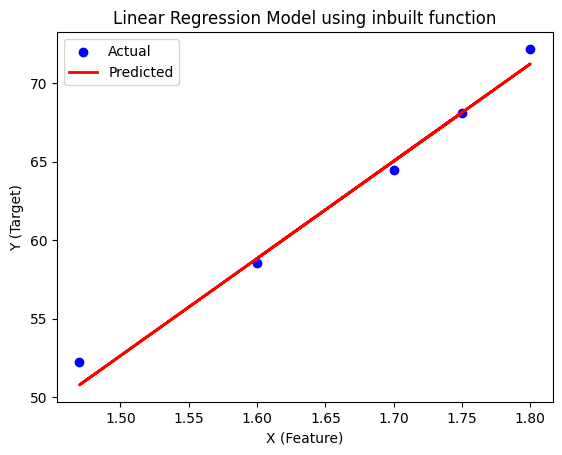

In [ ]:
print("Plot the the inbuilt regression model")
if X.shape[1] == 1:
    plt.scatter(X_test, y_test, color='blue', label="Actual")
    plt.plot(X_test, y_pred_inbuilt, color='red', linewidth=2, label="Predicted")
    plt.xlabel("X (Feature)")
    plt.ylabel("Y (Target)")
    plt.title("Linear Regression Model using inbuilt function")
    plt.legend()
    plt.show()

Plot the the test regression model


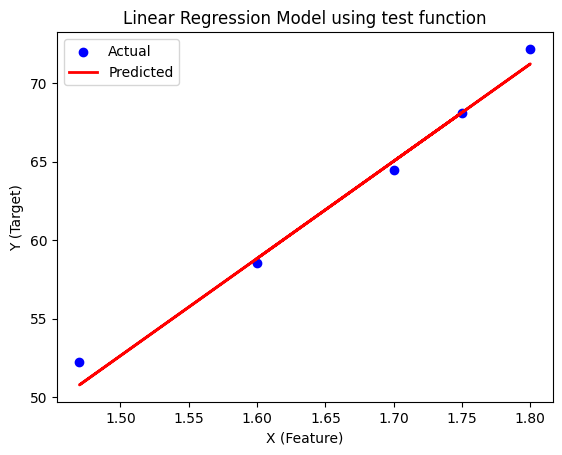

In [ ]:
print("Plot the the test regression model")
if X.shape[1] == 1:
    plt.scatter(X_test, y_test, color='blue', label="Actual")
    plt.plot(X_test, y_pred_test, color='red', linewidth=2, label="Predicted")
    plt.xlabel("X (Feature)")
    plt.ylabel("Y (Target)")
    plt.title("Linear Regression Model using test function")
    plt.legend()
    plt.show()

Q2b: Logistic Regression Task.
Use the “logistic_regression_dataset.csv”

In [ ]:
1. Split the dataset into training set and test set in the ratio of 70:30 or 80:20

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "/Users/souvmond/Downloads/Study/Material/Machine Learning/Assignment/logistic_regression_dataset.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # Features (independent variables)
y = df.iloc[:, -1]   # Target (dependent variable)

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the sizes of each set
print("70:30 split")
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of each set
print("\n80:20 split")
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

70:30 split
Training set size: (280, 4) (280,)
Test set size: (120, 4) (120,)

80:20 split
Training set size: (320, 4) (320,)
Test set size: (80, 4) (80,)


2. Train the logistic regression classifier (using inbuilt function: LogisticRegression from
sklearn).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/Users/souvmond/Downloads/Study/Material/Machine Learning/Assignment/logistic_regression_dataset.csv"  # Update with your file path
df = pd.read_csv(file_path)


# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("categorical_columns", list(categorical_columns ))


# Encode categorical columns using Label Encoding
label_encoders = {}  # Dictionary to store encoders for later use
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Assuming the last column 'Purchased' is the target variable
X = df.iloc[:, :-1]  # Features (independent variables)
y = df.iloc[:, -1]   # Target (dependent variable)

# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


categorical_columns ['Gender']
Model Accuracy: 0.85
Intercept: [-9.78530052e-06]
Coefficients: [[-6.95393255e-07 -2.55038558e-04  1.97701865e-01  3.31181005e-05]]


3. Print the confusion matrix and accuracy.

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Confusion Matrix:
 [[71  2]
 [16 31]]
Model Accuracy: 0.85


Q3. Use the dataset “Bank_Personal_Loan_Modelling.csv”

1. Store the dataset in your google drive and in Colab file load the dataset from your drive.

In [ ]:
# We first stored the dataset in our Google Drive and then loaded it in Colab
import pandas as pd
# from google.colab import drive
# drive.mount("/content/drive")
# ds_PL = pd.read_csv("/content/drive/My Drive/Machine Learning Assignment/Bank_Personal_Loan_Modelling.csv")
ds_PL = pd.read_csv("../datasets/Bank_Personal_Loan_Modelling.csv")

2- Check the shape and head of the dataset.

In [ ]:
# We check the number of rows and columns in the dataset and display the first 5 rows
shape = ds_PL.shape
head = ds_PL.head(5)
print("Shape of the dataset:", shape)
head

Shape of the dataset: (5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


3. Age, Experience, Income, CCAvg, Mortgage, Securities are the features and Credit Card
is your Target Variable.

i. Take any 3 features from the six features given above

In [ ]:
# We select the features 'Income', 'Experience', and 'CCAvg' and the target variable 'Personal Loan'
# We will use these features to train the model
# We will use the target variable to evaluate the model
# We will also use the target variable to plot a 3D scatter plot
# We will use the target variable to split the dataset into training and testing sets
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report

features = ['Income', 'Experience', 'CCAvg' ]
target = 'Personal Loan'

ii. Store features and targets into a separate variable.

In [ ]:
## Storing the features and targets into a separate variable
X = ds_PL[features]
y = ds_PL[target]

iii. Look for missing values in the data, if any, and address them accordingly.


In [ ]:
print("\nMissing values:")
print(X.isnull().sum())


Missing values:
Income        0
Experience    0
CCAvg         0
dtype: int64


iv. Plot a 3D scatter plot using Matplotlib.

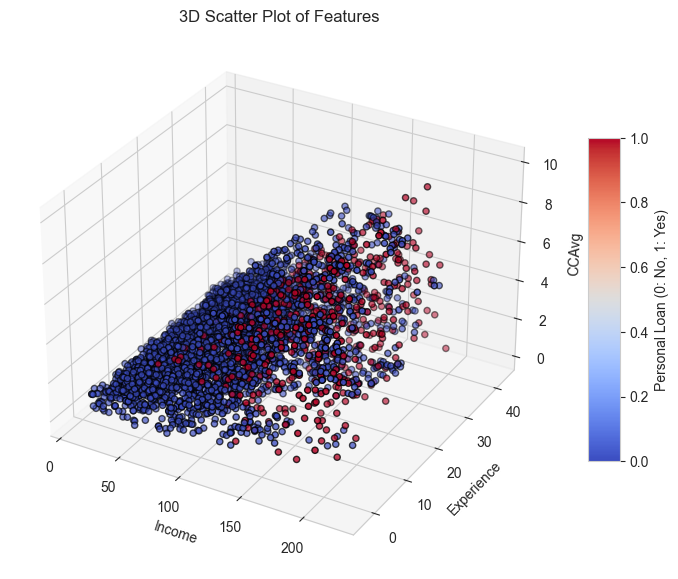

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['Income'], X['Experience'], X['CCAvg'], c=y, cmap='coolwarm', edgecolor='k')
ax.set_xlabel('Income')
ax.set_ylabel('Experience')
ax.set_zlabel('CCAvg')
ax.set_title('3D Scatter Plot of Features')
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6, aspect=10)
cbar.set_label('Personal Loan (0: No, 1: Yes)')
plt.show()

In [ ]:
# 4. Split the dataset into 80:20. (3 features and 1 target variable)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of train and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (4000, 3) (4000,)
Testing set shape: (1000, 3) (1000,)


In [ ]:


# 5. Train the model using scikit learn SVM API (LinearSVC) by setting the regularization
# parameter C as C = {0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000}.
# i. For each value of C Print the score on test data
# ii. Make the prediction on test data
# iii. Print confusion matrix and classification report

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape, y_train.shape)

# Define regularization parameter values
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Train and evaluate models for each C value
predictions = {}
for C in C_values:
    model = LinearSVC(C=C, max_iter=5000, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    predictions[C] = y_pred
    print(f"C = {C} → Accuracy: {accuracy:.4f}")

     # Print confusion matrix and classification report
    print(f"Confusion Matrix for C = {C}:\n{confusion_matrix(y_test, y_pred)}\n")
    print(f"Classification Report for C = {C}:\n{classification_report(y_test, y_pred)}\n")

# # Store predictions for each C value
for C, preds in predictions.items():
    print(f"Predictions for C = {C}: {preds[:10]}")  # Print first 10 predictions

Training set shape: (4000, 3) (4000,)
Best C: 1 with cross-validation accuracy: 0.9042
C = 0.0001 → Accuracy: 0.8910
Confusion Matrix for C = 0.0001:
[[876  19]
 [ 90  15]]

Classification Report for C = 0.0001:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       895
           1       0.44      0.14      0.22       105

    accuracy                           0.89      1000
   macro avg       0.67      0.56      0.58      1000
weighted avg       0.86      0.89      0.87      1000


C = 0.001 → Accuracy: 0.8950
Confusion Matrix for C = 0.001:
[[891   4]
 [101   4]]

Classification Report for C = 0.001:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       895
           1       0.50      0.04      0.07       105

    accuracy                           0.90      1000
   macro avg       0.70      0.52      0.51      1000
weighted avg       0.86      0.90      0.85      1000


C = 0.01 →

In [ ]:
# 6. Use gridSearchCV a cross-validation technique to find the best regularization
# parameters (i.e.: the best value of C).

# Use GridSearchCV to find the best C value
param_grid = {'C': C_values}
grid_search = GridSearchCV(LinearSVC(max_iter=5000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameter and best score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_
print(f"Best C: {best_C} with cross-validation accuracy: {best_score:.4f}")

Best C: 1 with cross-validation accuracy: 0.9042


Q4. Decision Tree and Random Forest
Load the IRIS dataset. The dataset consists of 150 samples of iris flowers, each belonging to
one of three species (setosa, versicolor, or virginica). Each sample includes four features: sepal
length, sepal width, petal length, and petal width.

1. Visualize the distribution of each feature and the class distribution.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Dataset Info:
 None

First 5 rows:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


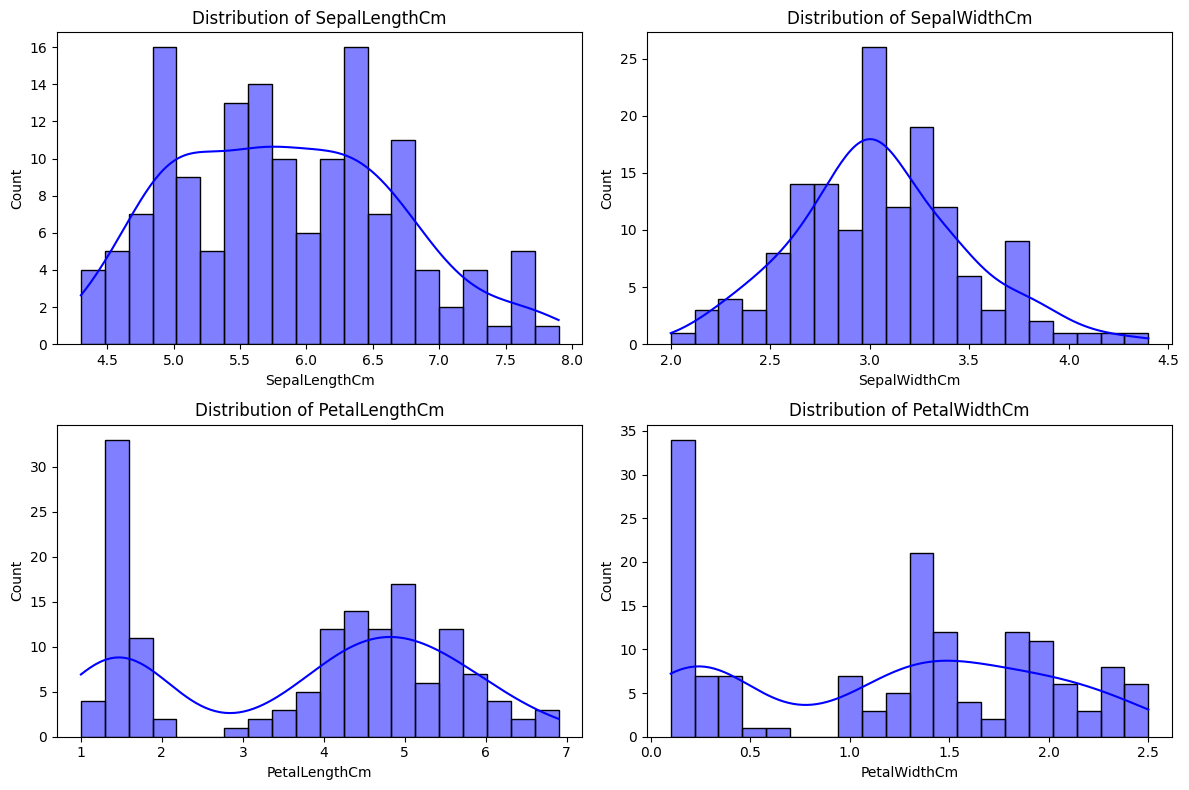

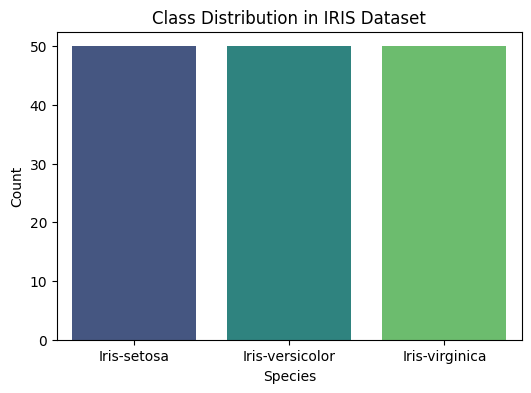

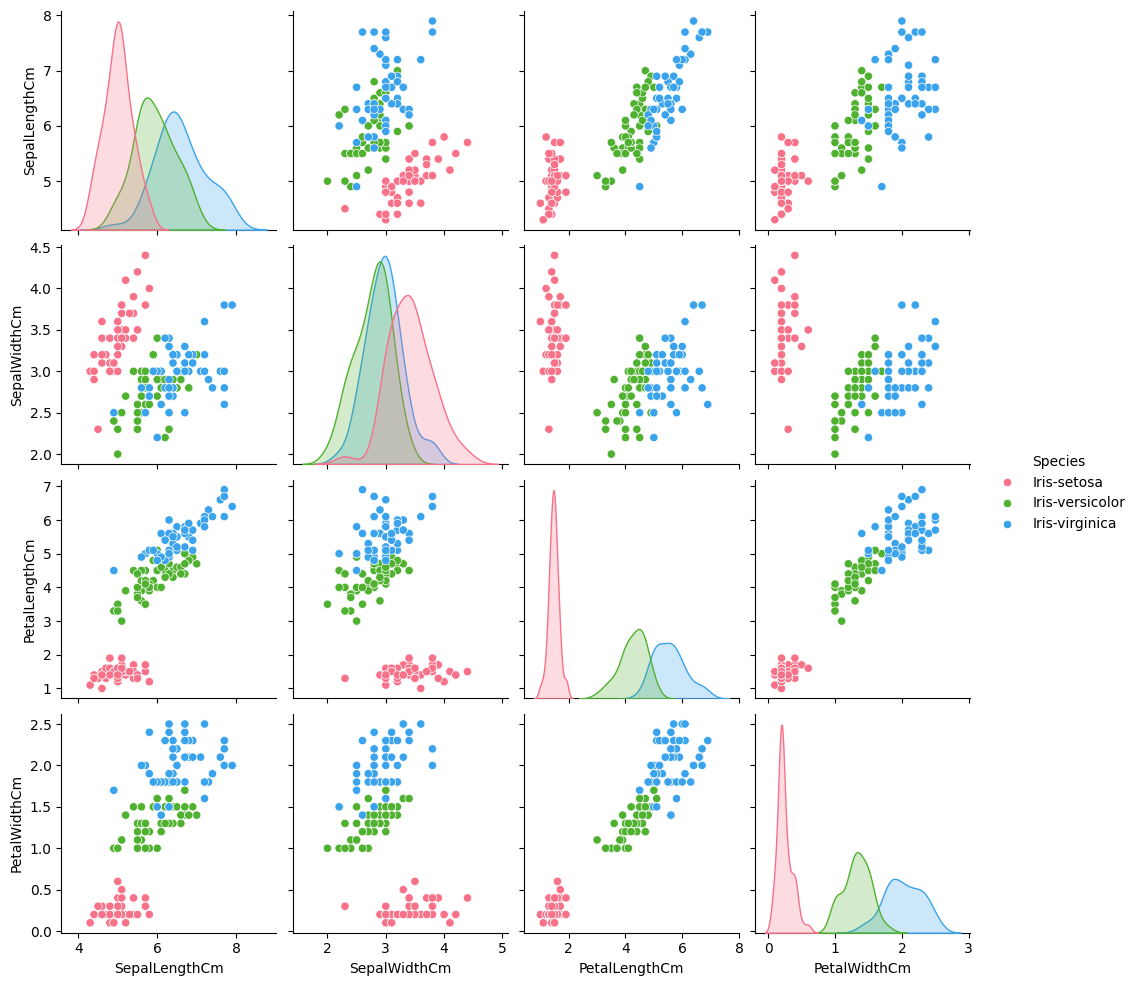

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/Users/souvmond/Downloads/Study/Material/Machine Learning/Assignment/Iris.csv"
df = pd.read_csv(file_path)

# Drop the ID column
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

# Display dataset info
print("Dataset Info:\n", df.info())
print("\nFirst 5 rows:\n", df.head())

# ---- Feature Distribution ----
features = df.columns[:-1]  # All columns except species

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

# ---- Class Distribution ----
plt.figure(figsize=(6, 4))
sns.countplot(x="Species", data=df, hue="Species", palette="viridis", legend=False)
plt.title("Class Distribution in IRIS Dataset")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

# ---- Pairplot to Visualize Feature Relationships ----
sns.pairplot(df, hue="Species", palette="husl")
plt.show()


2. Encode the categorical target variable (species) into numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Species' column
df['Species'] = label_encoder.fit_transform(df['Species'])

# Display the mapping of species to numbers
species_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Encoded Class Mapping:", species_mapping)

# Display the first 5 rows
print(df.head())

Encoded Class Mapping: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


3. Split the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
# Target variable is 'Species'.
X = df.drop(columns=['Species'])  # Features (all columns except 'species')
y = df['Species']  # Target variable (species)

# Splitting the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Print the sizes of the training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (105, 4)
Testing set size: (45, 4)


4. Decision Tree Model

i. Build a decision tree classifier using the training set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Train the model using the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Decision Tree Accuracy: 0.9778

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



ii. Visualize the resulting decision tree.

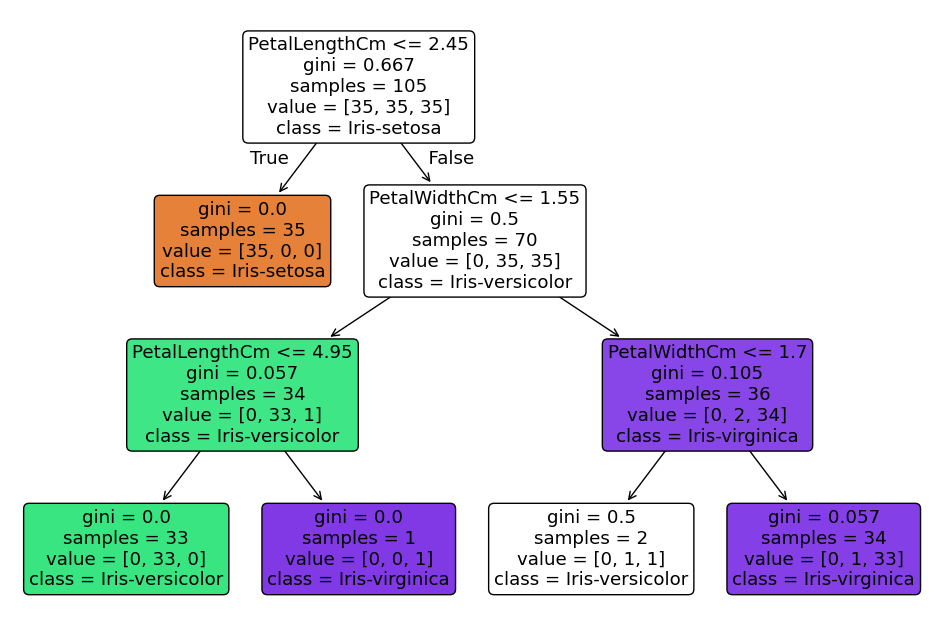

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the decision tree
plot_tree(dt_classifier, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)

# Show the plot
plt.show()


iii. Make predictions on the testing set and evaluate the model's performance using
appropriate metrics (e.g., accuracy, confusion matrix).

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Step 2: Print actual vs predicted values
print("Actual vs Predicted Species:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {predicted}")

# Step 3: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:" ,accuracy)

# Step 4: Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Actual vs Predicted Species:
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 2, Predicted: 2
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 2, Predicted: 2
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 2
Actual: 1, 

5. Random Forest Model

i. Build a random forest classifier using the training set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.89
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



ii. Tune the hyperparameters (e.g., number of trees, maximum depth) if necessary.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "/Users/souvmond/Downloads/Study/Material/Machine Learning/Assignment/Iris.csv"
df = pd.read_csv(file_path)

# Encode categorical target variable
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

# Split data into features and target variable
X = df.drop(columns=['Species', 'Id'])  # Assuming 'Id' is not needed
y = df['Species']

# Split dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 5, 10],      # Maximum depth of trees
    'max_features': ['sqrt', 'log2'] # Maximum features to consider
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Best Accuracy: 0.9428571428571428


iii. Make predictions on the testing set and evaluate the model's performance using
appropriate metrics and compare it with the decision tree model.


Random Forest Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Random Forest Accuracy: 1.0

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Decision Tree Accuracy: 1.0

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Compa

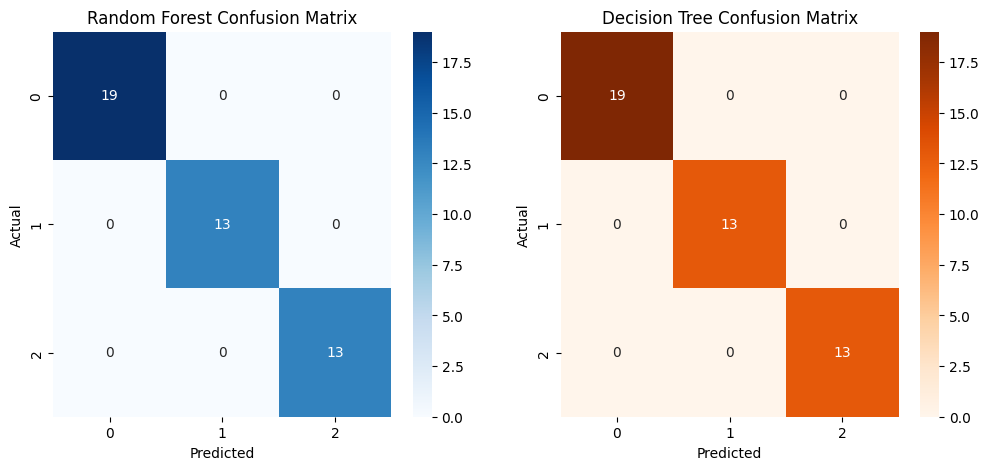

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
file_path = "/Users/souvmond/Downloads/Study/Material/Machine Learning/Assignment/Iris.csv"
df = pd.read_csv(file_path)

# Encode categorical target variable
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

# Split data into features and target variable
X = df.drop(columns=['Species', 'Id'])  # Assuming 'Id' is not needed
y = df['Species']

# Split dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 5, 10],      # Maximum depth of trees
    'max_features': ['sqrt', 'log2'] # Maximum features to consider
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best Random Forest model
best_rf = grid_search.best_estimator_

# Make predictions using the best model
y_pred_rf = best_rf.predict(X_test)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest Best Parameters:", grid_search.best_params_)
print("Random Forest Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Train a Decision Tree model for comparison
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate Decision Tree model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

print("\nDecision Tree Accuracy:", dt_accuracy)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Compare Performance
print("\nComparison of Model Performance:")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Decision Tree Confusion Matrix
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()
